In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/training_data.zip -d /content/drive/MyDrive

In [ ]:
!unzip /content/drive/MyDrive/public_test.zip -d /content/drive/MyDrive

Archive:  /content/drive/MyDrive/public_test.zip
  inflating: /content/drive/MyDrive/public_test/images/1/0.jpg  
  inflating: /content/drive/MyDrive/public_test/images/1/1.jpg  
  inflating: /content/drive/MyDrive/public_test/images/1/10.jpg  
  inflating: /content/drive/MyDrive/public_test/images/1/11.jpg  
  inflating: /content/drive/MyDrive/public_test/images/1/12.jpg  
  inflating: /content/drive/MyDrive/public_test/images/1/13.jpg  
  inflating: /content/drive/MyDrive/public_test/images/1/14.jpg  
  inflating: /content/drive/MyDrive/public_test/images/1/15.jpg  
  inflating: /content/drive/MyDrive/public_test/images/1/16.jpg  
  inflating: /content/drive/MyDrive/public_test/images/1/17.jpg  
  inflating: /content/drive/MyDrive/public_test/images/1/18.jpg  
  inflating: /content/drive/MyDrive/public_test/images/1/19.jpg  
  inflating: /content/drive/MyDrive/public_test/images/1/2.jpg  
  inflating: /content/drive/MyDrive/public_test/images/1/20.jpg  
  inflating: /content/drive/My

In [ ]:
!unzip /content/drive/MyDrive/OCR_Data/easy_images.zip -d /content

In [ ]:
!unzip /content/drive/MyDrive/OCR_Data/diff_images.zip -d /content

In [ ]:
!unzip /content/drive/MyDrive/OCR_Data/image_before_preprocess.zip -d /content

## EDA Data

In [ ]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

# Set the path to your dataset
dataset_path = "/content/easy_images/images"

# Function to compute and display image statistics
def image_statistics(fold_path):
    sizes = []
    image_files = os.listdir(fold_path)
    for image_file in image_files:
            img_path = os.path.join(fold_path, image_file)
            img = Image.open(img_path)
            sizes.append(img.size)

    sizes_df = pd.DataFrame(sizes, columns=['Width', 'Height'])
    print("Image Statistics:")
    print(sizes_df.describe())

    # Plot image sizes
    plot_image_sizes(sizes_df)

    # Plot aspect ratio histogram
    plot_aspect_ratio_histogram(sizes_df)

def plot_image_sizes(sizes_df):
    plt.figure(figsize=(10, 6))
    plt.scatter(sizes_df['Width'], sizes_df['Height'], alpha=0.5)
    plt.title('Image Sizes')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.show()

def plot_aspect_ratio_histogram(sizes_df):
    aspect_ratios = sizes_df['Width'] / sizes_df['Height']
    plt.figure(figsize=(10, 6))
    plt.hist(aspect_ratios, bins=30, edgecolor='black')
    plt.title('Aspect Ratio Histogram')
    plt.xlabel('Aspect Ratio (Width/Height)')
    plt.ylabel('Frequency')
    plt.show()

# Perform EDA
# image_statistics(dataset_path)

In [ ]:
# import os
# from PIL import Image
# import pandas as pd
# import matplotlib.pyplot as plt

# # Set the path to your dataset
# dataset_path = "/content/easy_images/images"

# # Function to compute and display image statistics
# def image_statistics(path):
#     sizes = []
#     for fold in os.listdir(path):
#         fold_path = os.path.join(path, fold)
#         print(fold_path)
#         image_files = os.listdir(fold_path)
#         for image_file in image_files:
#             img_path = os.path.join(fold_path, image_file)
#             img = Image.open(img_path)
#             sizes.append(img.size)

#     sizes_df = pd.DataFrame(sizes, columns=['Width', 'Height'])
#     print("Image Statistics:")
#     print(sizes_df.describe())

#     # Plot image sizes
#     plot_image_sizes(sizes_df)

#     # Plot aspect ratio histogram
#     plot_aspect_ratio_histogram(sizes_df)

# def plot_image_sizes(sizes_df):
#     plt.figure(figsize=(10, 6))
#     plt.scatter(sizes_df['Width'], sizes_df['Height'], alpha=0.5)
#     plt.title('Image Sizes')
#     plt.xlabel('Width')
#     plt.ylabel('Height')
#     plt.show()

# def plot_aspect_ratio_histogram(sizes_df):
#     aspect_ratios = sizes_df['Width'] / sizes_df['Height']
#     plt.figure(figsize=(10, 6))
#     plt.hist(aspect_ratios, bins=30, edgecolor='black')
#     plt.title('Aspect Ratio Histogram')
#     plt.xlabel('Aspect Ratio (Width/Height)')
#     plt.ylabel('Frequency')
#     plt.show()

# # Perform EDA
# image_statistics(dataset_path)

In [ ]:
dataset_test_path = "/content/drive/MyDrive/public_test/images"
image_statistics(dataset_test_path)

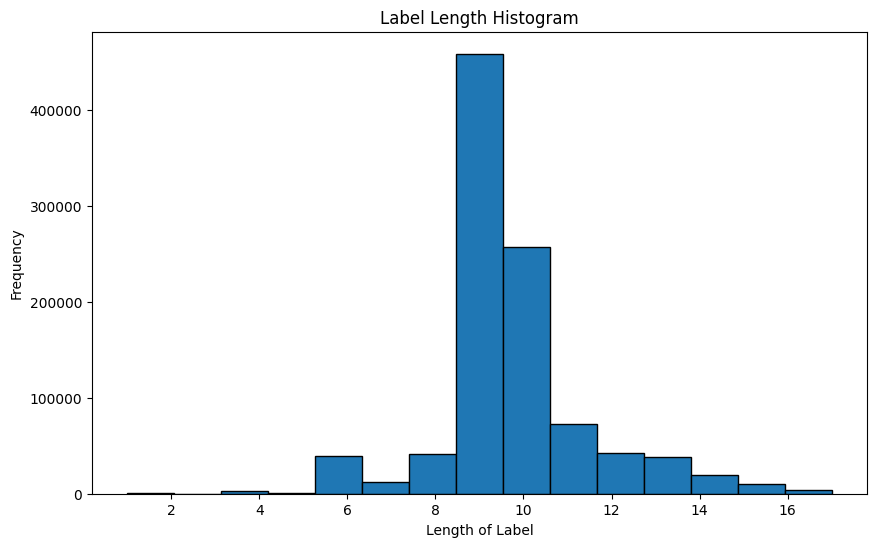

In [ ]:
import matplotlib.pyplot as plt

# Read data from file
file_path = "/content/drive/MyDrive/difficult_labels.txt"  # Replace with the actual path to your file
with open(file_path, 'r', encoding='utf-8') as file:
    data = file.readlines()

# Extract label lengths
label_lengths = [len(line.split('\t')[1].strip().split()) for line in data]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(label_lengths, bins=15, edgecolor='black')
plt.title('Label Length Histogram')
plt.xlabel('Length of Label')
plt.ylabel('Frequency')
plt.show()

In [ ]:
max_length_text = ""
i=1
with open("/content/drive/MyDrive/difficult_labels.txt", "r", encoding="utf-8") as file:
  lines = file.readlines()
  for line in lines:
    text = line.strip().split("\t")[1]
    if len(text)>len(max_length_text):
      max_length_text = text
print(len(max_length_text))

68


In [ ]:
import random
# Function to load and display random images
def display_random_images(path, num_images=5):
    for fold in os.listdir(path):
        fold_path = os.path.join(path, fold)
        try:
          image_files = random.sample(os.listdir(fold_path), num_images)
        except:
          continue
        plt.figure(figsize=(15, 5))
        for i, image_file in enumerate(image_files, 1):
            img_path = os.path.join(fold_path, image_file)
            img = Image.open(img_path)

            plt.subplot(1, num_images, i)
            plt.imshow(img)
            plt.title(f"Image {i}")
            plt.axis('off')

        plt.show()
display_random_images(dataset_path, num_images=5)

## Prepare Dataset for training

In [ ]:
# import os

# # Set the path to the folder containing annotation files
# folder_path = "/content/drive/MyDrive/training_data/annotations"

# # Create an empty string to store concatenated content
# concatenated_content = ""

# # Iterate through all files in the folder
# for file_name in os.listdir(folder_path):
#     file_path = os.path.join(folder_path, file_name)

#     # Check if the path is a file (not a directory)
#     if os.path.isfile(file_path):
#         with open(file_path, 'r', encoding='utf-8') as file:
#             # Read the content of each file and append to the concatenated string
#             file_content = file.read().strip()
#             concatenated_content += file_content + '\n'

# # Set the path for the output concatenated file
# output_path = "/content/drive/MyDrive/training_data/labels.txt"

# # Write the concatenated content to the output file
# with open(output_path, 'w', encoding='utf-8') as output_file:
#     output_file.write(concatenated_content)

# print(f"Concatenation completed. Output file: {output_path}")

In [ ]:
import os
import random

# Set the path to the annotation file
# annotation_file_path = "/content/drive/MyDrive/training_data/labels.txt"
annotation_file_path = "/content/image_before_preprocess/annotations/labels.txt"

# Set the ratio for splitting (e.g., 80% train, 20% val)
train_ratio = 0.8

# Read the content of the annotation file
with open(annotation_file_path, 'r', encoding='utf-8') as annotation_file:
    annotations = annotation_file.readlines()

# Shuffle the annotations before splitting
random.shuffle(annotations)

# Split the annotations into training and validation sets
num_annotations = len(annotations)
num_train = int(num_annotations * train_ratio)

train_annotations = annotations[:num_train]
val_annotations = annotations[num_train:]

# Set the paths for the output train and val files
train_output_path = "/content/drive/MyDrive/training_non_pre_label/train.txt"
val_output_path = "/content/drive/MyDrive/training_non_pre_label/val.txt"

# Write the training annotations to the output file
with open(train_output_path, 'w', encoding='utf-8') as train_file:
    train_file.writelines(train_annotations)

# Write the validation annotations to the output file
with open(val_output_path, 'w', encoding='utf-8') as val_file:
    val_file.writelines(val_annotations)

print(f"Splitting and saving completed. Train file: {train_output_path}, Val file: {val_output_path}")

Splitting and saving completed. Train file: /content/drive/MyDrive/training_non_pre_label/train.txt, Val file: /content/drive/MyDrive/training_non_pre_label/val.txt


In [ ]:
import os
import random

# Set the path to the annotation file
# annotation_file_path = "/content/drive/MyDrive/training_data/labels.txt"
annotation_file_path = "/content/drive/MyDrive/difficult_labels.txt"

# Set the ratio for splitting (e.g., 80% train, 20% val)
train_ratio = 0.8

# Read the content of the annotation file
with open(annotation_file_path, 'r', encoding='utf-8') as annotation_file:
    annotations = annotation_file.readlines()

# Shuffle the annotations before splitting
random.shuffle(annotations)

# Split the annotations into training and validation sets
num_annotations = len(annotations)
num_train = int(num_annotations * train_ratio)

train_annotations = annotations[:num_train]
val_annotations = annotations[num_train:]

# Set the paths for the output train and val files
train_output_path = "/content/drive/MyDrive/training_non_pre_label/train.txt"
val_output_path = "/content/drive/MyDrive/training_non_pre_label/val.txt"

# Write the training annotations to the output file
with open(train_output_path, 'w', encoding='utf-8') as train_file:
    train_file.writelines(train_annotations)

# Write the validation annotations to the output file
with open(val_output_path, 'w', encoding='utf-8') as val_file:
    val_file.writelines(val_annotations)

print(f"Splitting and saving completed. Train file: {train_output_path}, Val file: {val_output_path}")

Splitting and saving completed. Train file: /content/drive/MyDrive/diff_label/train.txt, Val file: /content/drive/MyDrive/diff_label/val.txt


In [ ]:
import os
import random

# Set the path to the annotation file
# annotation_file_path = "/content/drive/MyDrive/training_data/labels.txt"
annotation_file_path = "/content/drive/MyDrive/difficult_labels.txt"

# Set the ratio for splitting (e.g., 80% train, 20% val)
train_ratio = 0.8

# Read the content of the annotation file
with open(annotation_file_path, 'r', encoding='utf-8') as annotation_file:
    annotations = annotation_file.readlines()

# Shuffle the annotations before splitting
random.shuffle(annotations)

# Split the annotations into training and validation sets
num_annotations = len(annotations)
num_train = int(num_annotations * train_ratio)

train_annotations = annotations[:num_train]
val_annotations = annotations[num_train:]

# Set the paths for the output train and val files
train_output_path = "/content/drive/MyDrive/training_non_pre_label/train.txt"
val_output_path = "/content/drive/MyDrive/training_non_pre_label/val.txt"

# Write the training annotations to the output file
with open(train_output_path, 'w', encoding='utf-8') as train_file:
    train_file.writelines(train_annotations)

# Write the validation annotations to the output file
with open(val_output_path, 'w', encoding='utf-8') as val_file:
    val_file.writelines(val_annotations)

print(f"Splitting and saving completed. Train file: {train_output_path}, Val file: {val_output_path}")

Splitting and saving completed. Train file: /content/drive/MyDrive/diff_label/train.txt, Val file: /content/drive/MyDrive/diff_label/val.txt


## Train Model

In [ ]:
# %cd /content/drive/MyDrive
%cd /content
!git clone https://github.com/PaddlePaddle/PaddleOCR.git

/content
Cloning into 'PaddleOCR'...
remote: Enumerating objects: 47598, done.
remote: Counting objects: 100% (839/839), done.
remote: Compressing objects: 100% (396/396), done.
remote: Total 47598 (delta 542), reused 661 (delta 438), pack-reused 46759
Receiving objects: 100% (47598/47598), 345.26 MiB | 16.61 MiB/s, done.
Resolving deltas: 100% (33394/33394), done.


In [ ]:
# %cd /content/drive/MyDrive/PaddleOCR
%cd /content/PaddleOCR
!pip install -r requirements.txt
!pip install paddlepaddle-gpu

/content/PaddleOCR
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 908.3/908.3 kB 12.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 299.2/299.2 kB 34.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.3/6.3 MB 17.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.3/3.3 MB 109.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 60.9/60.9 MB 10.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 67.1/67.1 MB 9.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 542.5/542.5 MB 1.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 75.0/75.0 kB 10.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 76.9/76.9 kB 11.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 58.3/58.3 kB 8.3 MB/s eta 0:00:00


### Setup the config.yml

In [ ]:
import yaml
%cd /content/PaddleOCR

with open("configs/rec/rec_r31_sar.yml", "r") as f:
    config = yaml.safe_load(f)
config['Global'].update({
    'epoch_num': 10,
    'eval_batch_step':[0,2500],
    'print_batch_step':100,
    'save_model_dir': '/content/drive/MyDrive/output/rec/rec_r31_sar_2',
    'pretrained_model':'/content/drive/MyDrive/output/rec/rec_r31_sar/best_accuracy.pdparams',
    'character_dict_path':'/content/PaddleOCR/ppocr/utils/dict/vi_dict.txt',
    'save_res_path': './output/rec/predict.txt',
    'save_epoch_step':100,
    'use_space_char':True,
    'max_text_length':30,
    'save_inference_dir': '/content/drive/MyDrive/save_model/rec_r31_sar',
    'distributed': True,
})
config['Train']['dataset'].update({
    'name': 'SimpleDataSet',
    'data_dir': '/content/easy_images/images',
    'label_file_list': ['/content/drive/MyDrive/essay_label/train.txt'],
})
config['Eval']['dataset'].update({
    'name': 'SimpleDataSet',
    'data_dir': '/content/easy_images/images',
    'label_file_list': ['/content/drive/MyDrive/essay_label/val.txt'],
})

config['Architecture']['Backbone'].update({
    'name': 'MobileNetV3',
    'scale': 1.25,
    'model_name':'large'
})
config['Train']['loader'].update({
    'batch_size_per_card':32,
})
config['Eval']['loader'].update({
    'batch_size_per_card':32,
})
with open("configs/rec/rec_r31_sar.yml", "w") as f:
    yaml.safe_dump(config, f)

/content/PaddleOCR


### Train your Model üèãÔ∏è‚Äç‚ôÄÔ∏è

In [ ]:
# %cd /content/drive/MyDrive/PaddleOCR
%cd /content/PaddleOCR
!python3 tools/train.py -c configs/rec/rec_r31_sar.yml


/content/PaddleOCR
[2023/11/12 11:25:50] ppocr INFO: Architecture : 
[2023/11/12 11:25:50] ppocr INFO:     Backbone : 
[2023/11/12 11:25:50] ppocr INFO:         model_name : large
[2023/11/12 11:25:50] ppocr INFO:         name : MobileNetV3
[2023/11/12 11:25:50] ppocr INFO:         scale : 1.25
[2023/11/12 11:25:50] ppocr INFO:     Head : 
[2023/11/12 11:25:50] ppocr INFO:         head_list : 
[2023/11/12 11:25:50] ppocr INFO:             CTCHead : 
[2023/11/12 11:25:50] ppocr INFO:                 Head : 
[2023/11/12 11:25:50] ppocr INFO:                     fc_decay : 1e-05
[2023/11/12 11:25:50] ppocr INFO:                 Neck : 
[2023/11/12 11:25:50] ppocr INFO:                     depth : 2
[2023/11/12 11:25:50] ppocr INFO:                     dims : 64
[2023/11/12 11:25:50] ppocr INFO:                     hidden_dims : 120
[2023/11/12 11:25:50] ppocr INFO:                     name : svtr
[2023/11/12 11:25:50] ppocr INFO:                     use_guide : truea
[2023/11/12 11:25:50]

In [ ]:
import yaml
%cd /content/PaddleOCR

with open("configs/rec/rec_r31_sar.yml", "r") as f:
    config = yaml.safe_load(f)
config['Global'].update({
    'epoch_num': 10,
    'eval_batch_step':[0,2500],
    'print_batch_step':100,
    'save_model_dir': './output/rec/rec_r31_sar_3',
    'pretrained_model':'/content/drive/MyDrive/output/rec/rec_r31_sar_2/best_accuracy.pdparams',
    'character_dict_path':'/content/PaddleOCR/ppocr/utils/dict/vi_dict.txt',
    'save_res_path': './output/rec/predict.txt',
    'save_epoch_step':100,
    'use_space_char':True,
    'max_text_length':30,
    'save_inference_dir': './save_model/rec_r31_sar',
    'distributed': True,
})
config['Train']['dataset'].update({
    'name': 'SimpleDataSet',
    'data_dir': '/content/easy_images/images',
    'label_file_list': ['/content/drive/MyDrive/essay_label/train.txt'],
})
config['Eval']['dataset'].update({
    'name': 'SimpleDataSet',
    'data_dir': '/content/easy_images/images',
    'label_file_list': ['/content/drive/MyDrive/essay_label/val.txt'],
})

config['Architecture']['Backbone'].update({
    'name': 'MobileNetV3',
    'scale': 1.25,
    'model_name':'large'
})
config['Train']['loader'].update({
    'batch_size_per_card':32,
})
config['Eval']['loader'].update({
    'batch_size_per_card':32,
})
with open("configs/rec/rec_r31_sar.yml", "w") as f:
    yaml.safe_dump(config, f)

/content/PaddleOCR


In [ ]:
%cd /content/PaddleOCR
!python3 tools/train.py -c configs/rec/rec_r31_sar.yml

/content/PaddleOCR
[2023/11/12 16:31:04] ppocr INFO: Architecture : 
[2023/11/12 16:31:04] ppocr INFO:     Backbone : 
[2023/11/12 16:31:04] ppocr INFO:         model_name : large
[2023/11/12 16:31:04] ppocr INFO:         name : MobileNetV3
[2023/11/12 16:31:04] ppocr INFO:         scale : 1.25
[2023/11/12 16:31:04] ppocr INFO:     Head : 
[2023/11/12 16:31:04] ppocr INFO:         head_list : 
[2023/11/12 16:31:04] ppocr INFO:             CTCHead : 
[2023/11/12 16:31:04] ppocr INFO:                 Head : 
[2023/11/12 16:31:04] ppocr INFO:                     fc_decay : 1e-05
[2023/11/12 16:31:04] ppocr INFO:                 Neck : 
[2023/11/12 16:31:04] ppocr INFO:                     depth : 2
[2023/11/12 16:31:04] ppocr INFO:                     dims : 64
[2023/11/12 16:31:04] ppocr INFO:                     hidden_dims : 120
[2023/11/12 16:31:04] ppocr INFO:                     name : svtr
[2023/11/12 16:31:04] ppocr INFO:                     use_guide : truea
[2023/11/12 16:31:04]

In [ ]:
# Global:
#   cal_metric_during_train: true
#   character_dict_path: resources/vi_chars.txt
#   character_type: vi
#   checkpoints: null
#   debug: false
#   distributed: true
#   epoch_num: 10
#   eval_batch_step:
#   - 0
#   - 2500
#   infer_img: ./vutt_preprocess/test.jpg
#   infer_mode: false
#   log_smooth_window: 20
#   max_text_length: 25
#   # pretrained_model: PaddleOCR/pretrained_models/en_PP-OCRv3_rec_train/best_accuracy
#   pretrained_model:
#   print_batch_step: 500
#   save_epoch_step: 100
#   save_inference_dir: null
#   save_model_dir: PaddleOCR/output/rec_1_easy
#   save_res_path: ./output/rec/no_special_sar_ctc_dml.txt
#   use_gpu: true
#   use_space_char: true
#   use_visualdl: false
# Architecture:
#   Backbone:
#     name: MobileNetV1Enhance
#     scale: 0.5
#   Head:
#     name: MultiHead
#     head_list:
#     - CTCHead:
#         encoder_type: mobilevit
#         Head:
#           fc_decay: 1.0e-05
#         Neck:
#           name: svtr
#           dims: 64
#           depth: 2
#           hidden_dims: 120
#           use_guide: truea
#     - SARHead:
#         enc_dim: 512
#         max_text_length: 25
#   Transform: null
#   algorithm: SAR
#   model_type: rec
# Eval:
#   dataset:
#     name: LMDBDataSet
#     data_dir: ./train_data/synthesis_easy_test_lmdb/
#     transforms:
#     - DecodeImage:
#         channel_first: false
#         img_mode: BGR
#     - MultiLabelEncode: null
#     - SARRecResizeImg:
#         image_shape:
#         - 3
#         - 48
#         - 48
#         - 320
#         width_downsample_ratio: 0.25
#     - KeepKeys:
#         keep_keys:
#         - image
#         - label_ctc
#         - label_sar
#         - length
#         - valid_ratio
#   loader:
#     batch_size_per_card: 32
#     drop_last: false
#     num_workers: 4
#     shuffle: false
# Loss:
#   name: MultiLoss
#   loss_config_list:
#   - CTCLoss: null
#   - SARLoss: null
# Metric:
#   name: RecMetric
# Optimizer:
#   beta1: 0.9
#   beta2: 0.999
#   lr:
#     learning_rate: 0.000842
#     name: Cosine
#   name: Adam
#   regularizer:
#     factor: 1e-05
#     name: L2
# PostProcess:
#   name: CTCLabelDecode
# Train:
#   dataset:
#     name: LMDBDataSet
#     data_dir: ./train_data/synthesis_easy_train_lmdb
#     transforms:
#     - DecodeImage:
#         channel_first: false
#         img_mode: BGR
#     - MultiLabelEncode: null
#     - SARRecResizeImg:
#         image_shape:
#         - 3
#         - 48
#         - 48
#         - 320
#         width_downsample_ratio: 0.25
#     - KeepKeys:
#         keep_keys:
#         - image
#         - label_ctc
#         - label_sar
#         - length
#         - valid_ratio
#   loader:
#     batch_size_per_card: 32
#     drop_last: true
#     num_workers: 4
#     shuffle: true
# profiler_options: null


In [ ]:
import yaml
%cd /content/PaddleOCR

with open("configs/rec/rec_r31_sar.yml", "r") as f:
    config = yaml.safe_load(f)
config['Global'].update({
    'epoch_num': 5,
    'eval_batch_step':[0,2500],
    'print_batch_step':100,
    'save_model_dir': './output/rec/rec_r31_sar_3',
    'pretrained_model':'/content/drive/MyDrive/output/rec/rec_r31_sar_3/best_accuracy.pdparams',
    'character_dict_path':'/content/PaddleOCR/ppocr/utils/dict/vi_dict.txt',
    'save_res_path': './output/rec/predict.txt',
    'save_epoch_step':100,
    'use_space_char':True,
    'max_text_length':30,
    'save_inference_dir': './save_model/rec_r31_sar',
    'distributed': True,
})
config['Train']['dataset'].update({
    'name': 'SimpleDataSet',
    'data_dir': '/content/easy_images/images',
    'label_file_list': ['/content/drive/MyDrive/essay_label/train.txt'],
})
config['Eval']['dataset'].update({
    'name': 'SimpleDataSet',
    'data_dir': '/content/easy_images/images',
    'label_file_list': ['/content/drive/MyDrive/essay_label/val.txt'],
})

config['Architecture']['Backbone'].update({
    'name': 'MobileNetV3',
    'scale': 1.25,
    'model_name':'large'
})
config['Train']['loader'].update({
    'batch_size_per_card':32,
})
config['Eval']['loader'].update({
    'batch_size_per_card':32,
})
with open("configs/rec/rec_r31_sar.yml", "w") as f:
    yaml.safe_dump(config, f)

/content/PaddleOCR


In [ ]:
%cd /content/PaddleOCR
!python3 tools/train.py -c configs/rec/rec_r31_sar.yml

/content/PaddleOCR
[2023/11/13 10:55:41] ppocr INFO: Architecture : 
[2023/11/13 10:55:41] ppocr INFO:     Backbone : 
[2023/11/13 10:55:41] ppocr INFO:         model_name : large
[2023/11/13 10:55:41] ppocr INFO:         name : MobileNetV3
[2023/11/13 10:55:41] ppocr INFO:         scale : 1.25
[2023/11/13 10:55:41] ppocr INFO:     Head : 
[2023/11/13 10:55:41] ppocr INFO:         head_list : 
[2023/11/13 10:55:41] ppocr INFO:             CTCHead : 
[2023/11/13 10:55:41] ppocr INFO:                 Head : 
[2023/11/13 10:55:41] ppocr INFO:                     fc_decay : 1e-05
[2023/11/13 10:55:41] ppocr INFO:                 Neck : 
[2023/11/13 10:55:41] ppocr INFO:                     depth : 2
[2023/11/13 10:55:41] ppocr INFO:                     dims : 64
[2023/11/13 10:55:41] ppocr INFO:                     hidden_dims : 120
[2023/11/13 10:55:41] ppocr INFO:                     name : svtr
[2023/11/13 10:55:41] ppocr INFO:                     use_guide : truea
[2023/11/13 10:55:41]

In [ ]:
import yaml
%cd /content/PaddleOCR

with open("configs/rec/rec_r31_sar.yml", "r") as f:
    config = yaml.safe_load(f)
config['Global'].update({
    'epoch_num': 4,
    'eval_batch_step':[0,2500],
    'print_batch_step':100,
    'save_model_dir': './output/rec/rec_r31_sar_3',
    'pretrained_model':'/content/drive/MyDrive/output/rec/rec_r31_sar_3/best_accuracy.pdparams',
    'character_dict_path':'/content/PaddleOCR/ppocr/utils/dict/vi_dict.txt',
    'save_res_path': './output/rec/predict.txt',
    'save_epoch_step':100,
    'use_space_char':True,
    'max_text_length':30,
    'save_inference_dir': './save_model/rec_r31_sar',
    'distributed': True,
})
config['Train']['dataset'].update({
    'name': 'SimpleDataSet',
    'data_dir': '/content/easy_images/images',
    'label_file_list': ['/content/drive/MyDrive/essay_label/train.txt'],
})
config['Eval']['dataset'].update({
    'name': 'SimpleDataSet',
    'data_dir': '/content/easy_images/images',
    'label_file_list': ['/content/drive/MyDrive/essay_label/val.txt'],
})

config['Architecture']['Backbone'].update({
    'name': 'MobileNetV3',
    'scale': 1.25,
    'model_name':'large'
})
config['Train']['loader'].update({
    'batch_size_per_card':32,
})
config['Eval']['loader'].update({
    'batch_size_per_card':32,
})
with open("configs/rec/rec_r31_sar.yml", "w") as f:
    yaml.safe_dump(config, f)

/content/PaddleOCR


In [ ]:
%cd /content/PaddleOCR
!python3 tools/train.py -c configs/rec/rec_r31_sar.yml

/content/PaddleOCR
[2023/11/13 21:08:33] ppocr INFO: Architecture : 
[2023/11/13 21:08:33] ppocr INFO:     Backbone : 
[2023/11/13 21:08:33] ppocr INFO:         model_name : large
[2023/11/13 21:08:33] ppocr INFO:         name : MobileNetV3
[2023/11/13 21:08:33] ppocr INFO:         scale : 1.25
[2023/11/13 21:08:33] ppocr INFO:     Head : 
[2023/11/13 21:08:33] ppocr INFO:         head_list : 
[2023/11/13 21:08:33] ppocr INFO:             CTCHead : 
[2023/11/13 21:08:33] ppocr INFO:                 Head : 
[2023/11/13 21:08:33] ppocr INFO:                     fc_decay : 1e-05
[2023/11/13 21:08:33] ppocr INFO:                 Neck : 
[2023/11/13 21:08:33] ppocr INFO:                     depth : 2
[2023/11/13 21:08:33] ppocr INFO:                     dims : 64
[2023/11/13 21:08:33] ppocr INFO:                     hidden_dims : 120
[2023/11/13 21:08:33] ppocr INFO:                     name : svtr
[2023/11/13 21:08:33] ppocr INFO:                     use_guide : truea
[2023/11/13 21:08:33]

### Training Difficult data

In [ ]:
Architecture:
  Backbone:
    model_name: large
    name: MobileNetV3
    scale: 1.25
  Head:
    head_list:
    - CTCHead:
        Head:
          fc_decay: 1.0e-05
        Neck:
          depth: 2
          dims: 64
          hidden_dims: 120
          name: svtr
          use_guide: truea
        encoder_type: mobilevit
    - SARHead:
        enc_dim: 512
        max_text_length: 75
    name: MultiHead
  Transform: null
  algorithm: SAR
  model_type: rec
Eval:
  dataset:
    data_dir: /content/diff_images/images
    label_file_list:
    - /content/drive/MyDrive/diff_label/val.txt
    name: SimpleDataSet
    transforms:
    - DecodeImage:
        channel_first: false
        img_mode: BGR
    - MultiLabelEncode: null
    - SARRecResizeImg:
        image_shape:
        - 3
        - 48
        - 48
        - 720
        width_downsample_ratio: 0.25
    - KeepKeys:
        keep_keys:
        - image
        - label_ctc
        - label_sar
        - length
        - valid_ratio
  loader:
    batch_size_per_card: 16
    drop_last: false
    num_workers: 4
    shuffle: false
Global:
  cal_metric_during_train: true
  character_dict_path: /content/PaddleOCR/ppocr/utils/dict/vi_dict.txt
  character_type: vi
  checkpoints: null
  debug: false
  distributed: true
  epoch_num: 10
  eval_batch_step:
  - 0
  - 5000
  infer_img: ./vutt_preprocess/test.jpg
  infer_mode: false
  log_smooth_window: 20
  max_text_length: 75
  pretrained_model: /content/drive/MyDrive/best_acc.pdparams
  print_batch_step: 100
  save_epoch_step: 100
  save_inference_dir: ./save_model/rec_r31_sar
  save_model_dir: ./output/rec/rec_r31_sar_diff
  save_res_path: ./output/rec/predict.txt
  use_gpu: true
  use_space_char: true
  use_visualdl: false
Loss:
  loss_config_list:
  - CTCLoss: null
  - SARLoss: null
  name: MultiLoss
Metric:
  name: RecMetric
Optimizer:
  beta1: 0.9
  beta2: 0.999
  lr:
    learning_rate: 0.000991
    name: Cosine
  name: Adam
  regularizer:
    factor: 1e-05
    name: L2
PostProcess:
  name: CTCLabelDecode
Train:
  dataset:
    data_dir: /content/diff_images/images
    label_file_list:
    - /content/drive/MyDrive/diff_label/train.txt
    name: SimpleDataSet
    transforms:
    - DecodeImage:
        channel_first: false
        img_mode: BGR
    - MultiLabelEncode: null
    - SARRecResizeImg:
        image_shape:
        - 3
        - 48
        - 48
        - 720
        width_downsample_ratio: 0.25
    - KeepKeys:
        keep_keys:
        - image
        - label_ctc
        - label_sar
        - length
        - valid_ratio
  loader:
    batch_size_per_card: 16
    drop_last: true
    num_workers: 4
    shuffle: true
profiler_options: null


In [ ]:
import yaml
%cd /content/PaddleOCR

with open("configs/rec/rec_r31_sar.yml", "r") as f:
    config = yaml.safe_load(f)
config['Global'].update({
    'epoch_num': 50,
    'eval_batch_step':[0,2000],
    'print_batch_step':100,
    'save_model_dir': './output/rec/rec_r31_sar_diff',
    'pretrained_model':'/content/drive/MyDrive/best_accuracy.pdparams',
    'character_dict_path':'/content/PaddleOCR/ppocr/utils/dict/vi_dict.txt',
    'save_res_path': './output/rec/predict.txt',
    'save_epoch_step':100,
    'use_space_char':True,
    'max_text_length':75,
    'save_inference_dir': './save_model/rec_r31_sar',
    'distributed': True,
})
config['Train']['dataset'].update({
    'name': 'SimpleDataSet',
    'data_dir': '/content/diff_images/images',
    'label_file_list': ['/content/drive/MyDrive/training_non_pre_label/train.txt'],
})
config['Eval']['dataset'].update({
    'name': 'SimpleDataSet',
    'data_dir': '/content/diff_images/images',
    'label_file_list': ['/content/drive/MyDrive/training_non_pre_label/val.txt'],
})

config['Architecture']['Backbone'].update({
    'name': 'MobileNetV3',
    'scale': 1.25,
    'model_name':'large'
})
config['Train']['loader'].update({
    'batch_size_per_card':16,
})
config['Eval']['loader'].update({
    'batch_size_per_card':16,
})
with open("configs/rec/rec_r31_sar.yml", "w") as f:
    yaml.safe_dump(config, f)

/content/PaddleOCR


In [ ]:
%cd /content/PaddleOCR
!python3 tools/train.py -c configs/rec/rec_r31_sar.yml

/content/PaddleOCR
[2023/11/14 15:10:07] ppocr INFO: Architecture : 
[2023/11/14 15:10:07] ppocr INFO:     Backbone : 
[2023/11/14 15:10:07] ppocr INFO:         model_name : large
[2023/11/14 15:10:07] ppocr INFO:         name : MobileNetV3
[2023/11/14 15:10:07] ppocr INFO:         scale : 1.25
[2023/11/14 15:10:07] ppocr INFO:     Head : 
[2023/11/14 15:10:07] ppocr INFO:         head_list : 
[2023/11/14 15:10:07] ppocr INFO:             CTCHead : 
[2023/11/14 15:10:07] ppocr INFO:                 Head : 
[2023/11/14 15:10:07] ppocr INFO:                     fc_decay : 1e-05
[2023/11/14 15:10:07] ppocr INFO:                 Neck : 
[2023/11/14 15:10:07] ppocr INFO:                     depth : 2
[2023/11/14 15:10:07] ppocr INFO:                     dims : 64
[2023/11/14 15:10:07] ppocr INFO:                     hidden_dims : 120
[2023/11/14 15:10:07] ppocr INFO:                     name : svtr
[2023/11/14 15:10:07] ppocr INFO:                     use_guide : truea
[2023/11/14 15:10:07]

In [ ]:
%cd /content/PaddleOCR
!python3 tools/train.py -c configs/rec/rec_r31_sar.yml

/content/PaddleOCR
[2023/11/14 22:04:26] ppocr INFO: Architecture : 
[2023/11/14 22:04:26] ppocr INFO:     Backbone : 
[2023/11/14 22:04:26] ppocr INFO:         model_name : large
[2023/11/14 22:04:26] ppocr INFO:         name : MobileNetV3
[2023/11/14 22:04:26] ppocr INFO:         scale : 1.25
[2023/11/14 22:04:26] ppocr INFO:     Head : 
[2023/11/14 22:04:26] ppocr INFO:         head_list : 
[2023/11/14 22:04:26] ppocr INFO:             CTCHead : 
[2023/11/14 22:04:26] ppocr INFO:                 Head : 
[2023/11/14 22:04:26] ppocr INFO:                     fc_decay : 1e-05
[2023/11/14 22:04:26] ppocr INFO:                 Neck : 
[2023/11/14 22:04:26] ppocr INFO:                     depth : 2
[2023/11/14 22:04:26] ppocr INFO:                     dims : 64
[2023/11/14 22:04:26] ppocr INFO:                     hidden_dims : 120
[2023/11/14 22:04:26] ppocr INFO:                     name : svtr
[2023/11/14 22:04:26] ppocr INFO:                     use_guide : truea
[2023/11/14 22:04:26]

In [ ]:
%cd /content/PaddleOCR
!python3 tools/train.py -c configs/rec/rec_r31_sar.yml

/content/PaddleOCR
[2023/11/15 17:14:57] ppocr INFO: Architecture : 
[2023/11/15 17:14:57] ppocr INFO:     Backbone : 
[2023/11/15 17:14:57] ppocr INFO:         model_name : large
[2023/11/15 17:14:57] ppocr INFO:         name : MobileNetV3
[2023/11/15 17:14:57] ppocr INFO:         scale : 1.25
[2023/11/15 17:14:57] ppocr INFO:     Head : 
[2023/11/15 17:14:57] ppocr INFO:         head_list : 
[2023/11/15 17:14:57] ppocr INFO:             CTCHead : 
[2023/11/15 17:14:57] ppocr INFO:                 Head : 
[2023/11/15 17:14:57] ppocr INFO:                     fc_decay : 1e-05
[2023/11/15 17:14:57] ppocr INFO:                 Neck : 
[2023/11/15 17:14:57] ppocr INFO:                     depth : 2
[2023/11/15 17:14:57] ppocr INFO:                     dims : 64
[2023/11/15 17:14:57] ppocr INFO:                     hidden_dims : 120
[2023/11/15 17:14:57] ppocr INFO:                     name : svtr
[2023/11/15 17:14:57] ppocr INFO:                     use_guide : truea
[2023/11/15 17:14:57]

In [ ]:
import yaml
%cd /content/PaddleOCR

with open("configs/rec/rec_r31_sar.yml", "r") as f:
    config = yaml.safe_load(f)
config['Global'].update({
    'epoch_num': 3,
    'eval_batch_step':[0,10000],
    'print_batch_step':100,
    'save_model_dir': './output/rec/rec_r31_sar_diff',
    'pretrained_model':'/content/drive/MyDrive/best_accuracy.pdparams',
    'character_dict_path':'/content/PaddleOCR/ppocr/utils/dict/vi_dict.txt',
    'save_res_path': './output/rec/predict.txt',
    'save_epoch_step':100,
    'use_space_char':True,
    'max_text_length':75,
    'save_inference_dir': './save_model/rec_r31_sar',
    'distributed': True,
})
config['Train']['dataset'].update({
    'name': 'SimpleDataSet',
    'data_dir': '/content/diff_images/images',
    'label_file_list': ['/content/drive/MyDrive/diff_label/train.txt'],
})
config['Eval']['dataset'].update({
    'name': 'SimpleDataSet',
    'data_dir': '/content/diff_images/images',
    'label_file_list': ['/content/drive/MyDrive/diff_label/val.txt'],
})

config['Architecture']['Backbone'].update({
    'name': 'MobileNetV3',
    'scale': 1.25,
    'model_name':'large'
})
config['Train']['loader'].update({
    'batch_size_per_card':16,
})
config['Eval']['loader'].update({
    'batch_size_per_card':16,
})
with open("configs/rec/rec_r31_sar.yml", "w") as f:
    yaml.safe_dump(config, f)

/content/PaddleOCR


In [ ]:
%cd /content/PaddleOCR
!python3 tools/train.py -c configs/rec/rec_r31_sar.yml

/content/PaddleOCR
[2023/11/16 13:15:05] ppocr INFO: Architecture : 
[2023/11/16 13:15:05] ppocr INFO:     Backbone : 
[2023/11/16 13:15:05] ppocr INFO:         model_name : large
[2023/11/16 13:15:05] ppocr INFO:         name : MobileNetV3
[2023/11/16 13:15:05] ppocr INFO:         scale : 1.25
[2023/11/16 13:15:05] ppocr INFO:     Head : 
[2023/11/16 13:15:05] ppocr INFO:         head_list : 
[2023/11/16 13:15:05] ppocr INFO:             CTCHead : 
[2023/11/16 13:15:05] ppocr INFO:                 Head : 
[2023/11/16 13:15:05] ppocr INFO:                     fc_decay : 1e-05
[2023/11/16 13:15:05] ppocr INFO:                 Neck : 
[2023/11/16 13:15:05] ppocr INFO:                     depth : 2
[2023/11/16 13:15:05] ppocr INFO:                     dims : 64
[2023/11/16 13:15:05] ppocr INFO:                     hidden_dims : 120
[2023/11/16 13:15:05] ppocr INFO:                     name : svtr
[2023/11/16 13:15:05] ppocr INFO:                     use_guide : truea
[2023/11/16 13:15:05]

###  Training Model

In [ ]:
import yaml
%cd /content/PaddleOCR

with open("configs/rec/rec_r31_sar.yml", "r") as f:
    config = yaml.safe_load(f)
config['Global'].update({
    'epoch_num': 50,
    'eval_batch_step':[0,2024],
    'print_batch_step':100,
    'save_model_dir': './output/rec/rec_r31_sar_diff',
    'pretrained_model':'/content/drive/MyDrive/best_accuracy.pdparams',
    'character_dict_path':'/content/PaddleOCR/ppocr/utils/dict/vi_dict.txt',
    'save_res_path': './output/rec/predict.txt',
    'save_epoch_step':100,
    'use_space_char':True,
    'max_text_length':75,
    'save_inference_dir': './save_model/rec_r31_sar',
    'distributed': True,
})
config['Train']['dataset'].update({
    'name': 'SimpleDataSet',
    'data_dir': '/content/image_before_preprocess/images',
    'label_file_list': ['/content/drive/MyDrive/training_non_pre_label/train.txt'],
})
config['Eval']['dataset'].update({
    'name': 'SimpleDataSet',
    'data_dir': '/content/image_before_preprocess/images',
    'label_file_list': ['/content/drive/MyDrive/training_non_pre_label/val.txt'],
})

config['Architecture']['Backbone'].update({
    'name': 'MobileNetV3',
    'scale': 1.25,
    'model_name':'large'
})
config['Train']['loader'].update({
    'batch_size_per_card':16,
})
config['Eval']['loader'].update({
    'batch_size_per_card':16,
})
with open("configs/rec/rec_r31_sar.yml", "w") as f:
    yaml.safe_dump(config, f)

/content/PaddleOCR


In [ ]:
%cd /content/PaddleOCR
!python3 tools/train.py -c configs/rec/rec_r31_sar.yml

/content/PaddleOCR
[2023/11/17 01:14:03] ppocr INFO: Architecture : 
[2023/11/17 01:14:03] ppocr INFO:     Backbone : 
[2023/11/17 01:14:03] ppocr INFO:         model_name : large
[2023/11/17 01:14:03] ppocr INFO:         name : MobileNetV3
[2023/11/17 01:14:03] ppocr INFO:         scale : 1.25
[2023/11/17 01:14:03] ppocr INFO:     Head : 
[2023/11/17 01:14:03] ppocr INFO:         head_list : 
[2023/11/17 01:14:03] ppocr INFO:             CTCHead : 
[2023/11/17 01:14:03] ppocr INFO:                 Head : 
[2023/11/17 01:14:03] ppocr INFO:                     fc_decay : 1e-05
[2023/11/17 01:14:03] ppocr INFO:                 Neck : 
[2023/11/17 01:14:03] ppocr INFO:                     depth : 2
[2023/11/17 01:14:03] ppocr INFO:                     dims : 64
[2023/11/17 01:14:03] ppocr INFO:                     hidden_dims : 120
[2023/11/17 01:14:03] ppocr INFO:                     name : svtr
[2023/11/17 01:14:03] ppocr INFO:                     use_guide : truea
[2023/11/17 01:14:03]

### Evaluation

In [ ]:
import yaml
%cd /content/PaddleOCR

with open("configs/rec/rec_r31_sar.yml", "r") as f:
    config = yaml.safe_load(f)
config['Global'].update({
    'epoch_num': 50,
    'eval_batch_step':[0,2024],
    'print_batch_step':100,
    'save_model_dir': './output/rec/rec_r31_sar_diff',
    'pretrained_model':'/content/PaddleOCR/output/rec/rec_r31_sar_diff/best_accuracy.pdparams',
    'character_dict_path':'/content/PaddleOCR/ppocr/utils/dict/vi_dict.txt',
    'save_res_path': './output/rec/predict.txt',
    'save_epoch_step':100,
    'use_space_char':True,
    'max_text_length':75,
    'save_inference_dir': './save_model/rec_r31_sar',
    'distributed': True,
})
config['Train']['dataset'].update({
    'name': 'SimpleDataSet',
    'data_dir': '/content/image_before_preprocess/images',
    'label_file_list': ['/content/drive/MyDrive/training_non_pre_label/train.txt'],
})
config['Eval']['dataset'].update({
    'name': 'SimpleDataSet',
    'data_dir': '/content/image_before_preprocess/images',
    'label_file_list': ['/content/drive/MyDrive/training_non_pre_label/val.txt'],
})

config['Architecture']['Backbone'].update({
    'name': 'MobileNetV3',
    'scale': 1.25,
    'model_name':'large'
})
config['Train']['loader'].update({
    'batch_size_per_card':16,
})
config['Eval']['loader'].update({
    'batch_size_per_card':16,
})
with open("configs/rec/rec_r31_sar.yml", "w") as f:
    yaml.safe_dump(config, f)

/content/PaddleOCR


In [ ]:
%cd /content/PaddleOCR
!python3 /content/PaddleOCR/tools/eval.py -c ./configs/rec/rec_r31_sar.yml

/content/PaddleOCR
[2023/11/17 05:13:11] ppocr INFO: Architecture : 
[2023/11/17 05:13:11] ppocr INFO:     Backbone : 
[2023/11/17 05:13:11] ppocr INFO:         model_name : large
[2023/11/17 05:13:11] ppocr INFO:         name : MobileNetV3
[2023/11/17 05:13:11] ppocr INFO:         scale : 1.25
[2023/11/17 05:13:11] ppocr INFO:     Head : 
[2023/11/17 05:13:11] ppocr INFO:         head_list : 
[2023/11/17 05:13:11] ppocr INFO:             CTCHead : 
[2023/11/17 05:13:11] ppocr INFO:                 Head : 
[2023/11/17 05:13:11] ppocr INFO:                     fc_decay : 1e-05
[2023/11/17 05:13:11] ppocr INFO:                 Neck : 
[2023/11/17 05:13:11] ppocr INFO:                     depth : 2
[2023/11/17 05:13:11] ppocr INFO:                     dims : 64
[2023/11/17 05:13:11] ppocr INFO:                     hidden_dims : 120
[2023/11/17 05:13:11] ppocr INFO:                     name : svtr
[2023/11/17 05:13:11] ppocr INFO:                     use_guide : truea
[2023/11/17 05:13:11]

### Export Infer Model

In [ ]:
%cd /content/PaddleOCR

!python tools/export_model.py -c configs/rec/rec_r31_sar.yml -o Global.pretrained_model=/content/drive/MyDrive/best_accuracy  Global.save_inference_dir=/content/drive/MyDrive/save_model/rec_r31_sar



/content/PaddleOCR
W1117 13:06:20.796275  2874 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 7.5, Driver API Version: 12.0, Runtime API Version: 11.8
W1117 13:06:20.816972  2874 gpu_resources.cc:149] device: 0, cuDNN Version: 8.9.
[2023/11/17 13:06:25] ppocr INFO: load pretrain successful from /content/drive/MyDrive/best_accuracy
I1117 13:06:29.036088  2874 interpretercore.cc:237] New Executor is Running.
[2023/11/17 13:06:30] ppocr INFO: inference model is saved to /content/drive/MyDrive/save_model/rec_r31_sar/inference


### Prediction

In [ ]:
import yaml
%cd /content/PaddleOCR

with open("configs/rec/rec_r31_sar.yml", "r") as f:
    config = yaml.safe_load(f)
config['Global'].update({
    'infer_mode': True
})
with open("configs/rec/rec_r31_sar.yml", "w") as f:
    yaml.safe_dump(config, f)

/content/PaddleOCR


In [ ]:
import os

path = "/content/drive/MyDrive/public_test/images"

for fold in os.listdir(path):
    fold_path = os.path.join(path, fold)
    image_files = os.listdir(fold_path)

    for image_file in image_files:
        old_path = os.path.join(fold_path, image_file)

        # Extract the file extension
        _, extension = os.path.splitext(image_file)

        # Form the new file name (you can adjust the format as needed)
        new_name = f"{fold}_{image_file.replace(extension, '').zfill(4)}{extension}"

        # Create the new path
        new_path = os.path.join(fold_path, new_name)

        # Rename the file
        os.rename(old_path, new_path)

        print(f"Renamed: {image_file} to {new_name}")

In [ ]:
import os
import shutil
path = "/content/drive/MyDrive/public_test/images"
all_data = "/content/drive/MyDrive/public_test/all"
os.makedirs(all_data, exist_ok=True)
for fold in os.listdir(path):
    fold_path = os.path.join(path, fold)
    image_files = os.listdir(fold_path)
    for image_file in image_files:
      img_path = os.path.join(fold_path, image_file)
      shutil.move(img_path, all_data)


In [ ]:
%cd /content/PaddleOCR
!python3 tools/infer/predict_rec.py --image_dir="/content/drive/MyDrive/public_test/all/" \
                                   --use_gpu=True \
                                   --rec_model_dir="/content/drive/MyDrive/save_model/rec_r31_sar/"  \
                                   --rec_image_shape="3, 48,720"  \
                                   --rec_char_dict_path="/content/PaddleOCR/ppocr/utils/dict/vi_dict.txt"

/content/PaddleOCR
[2023/11/17 14:14:37] ppocr INFO: In PP-OCRv3, rec_image_shape parameter defaults to '3, 48, 320', if you are using recognition model with PP-OCRv2 or an older version, please set --rec_image_shape='3,32,320
[2023/11/17 14:14:47] ppocr INFO: Predicts of /content/drive/MyDrive/public_test/all/101_0000.jpg:('Thanh ƒê·ª©c Long H·ªì Vƒ©nh Long', 0.9526358842849731)
[2023/11/17 14:14:47] ppocr INFO: Predicts of /content/drive/MyDrive/public_test/all/101_0001.jpg:('Li√™n Ph∆∞∆°ng Th√†nh Ph·ªë H∆∞ng Y√™n H∆∞ng Y√™n', 0.9910719394683838)
[2023/11/17 14:14:47] ppocr INFO: Predicts of /content/drive/MyDrive/public_test/all/101_0002.jpg:('T·ªï 5 T√¢y Nam Vƒ©nh H·∫£i Nha Trung Kh√°nh Ho√†', 0.9918769001960754)
[2023/11/17 14:14:47] ppocr INFO: Predicts of /content/drive/MyDrive/public_test/all/101_0003.jpg:('Quy·∫øt Th·∫Øng Th√†nh Ph·ªë Bi√™n Ho√† ƒê·ªìng Nai', 0.9822291731834412)
[2023/11/17 14:14:47] ppocr INFO: Predicts of /content/drive/MyDrive/public_test/all/101_0004.jpg:(

In [ ]:
    # directory = "/content/PaddleOCR/output/rec/"
    # os.makedirs(directory, exist_ok=True)
    # file_path = "/content/PaddleOCR/output/rec/predict.txt"
    # with open(file_path, "w", encoding='utf-8') as f:
    #   for ino in range(len(img_list)):
    #     img_name = valid_image_file_list[ino].split("/")[-1]
    #     data = img_name + '\t'+ rec_res[ino][0]+'\n'
    #     f.writelines(data)

In [ ]:
import os
from PIL import Image
import pandas as pd
df = pd.DataFrame({
        'id': [],
        'answer': []
    })
with open("/content/PaddleOCR/output/rec/predict.txt", "r", encoding='utf-8') as f:
  lines = f.readlines()
  for line in lines:
    data = line.split("\t")
    label = data[1]
    file_string = data[0].split("_")
    fold = file_string[0]
    img_name = str(int(file_string[1].split(".jpg")[0]))+".jpg"
    file_path = os.path.join(fold,img_name)
    print(file_path,label)
    df = df.append({'id': file_path, 'answer': label.strip()}, ignore_index=True)
df.to_csv('sample_submission.csv', index=False)

101/0.jpg Thanh ƒê·ª©c Long H·ªì Vƒ©nh Long

101/1.jpg Li√™n Ph∆∞∆°ng Th√†nh Ph·ªë H∆∞ng Y√™n H∆∞ng Y√™n

101/2.jpg T·ªï 5 T√¢y Nam Vƒ©nh H·∫£i Nha Trung Kh√°nh Ho√†

101/3.jpg Quy·∫øt Th·∫Øng Th√†nh Ph·ªë Bi√™n Ho√† ƒê·ªìng Nai

101/4.jpg ·∫§p Minh D≈©ng Minh Thu·∫≠n U Minh Th∆∞·ª£ng Ki√™n Giang

101/5.jpg 69 Phan VƒÉn S·ªßu Ph∆∞·ªùng 1p T√¢n B√¨nh Tp H·ªì Ch√≠ Minh

101/6.jpg ƒêa Ph∆∞·ªõc B√¨nh Ch√°nh Tp H·ªì Ch√≠ Minh

101/7.jpg ·∫§p Hai T·∫•t T√¢y Y√™n A An Bi√™n Ki√™n Giang

101/8.jpg T√¢y H·ªì Th·ªç Xu√¢n Thanh Ho√°

101/9.jpg X√≥m T√¢n Ph∆∞·ªùng Tr·ª±c H√πng Tr·ª±c Ninh Nam ƒê·ªãnh

101/10.jpg 51a ·∫§p 3 Nh∆°n ƒê·ª©c Nh√† B√® H·ªì Ch√≠ Minh

101/11.jpg Kim √Çu ƒê·∫∑ng X√° Gia L√¢m H√† N·ªôi

101/12.jpg ·∫§p Ho√†n Qu√°n Long Gio C·∫©m M·ªπ ƒê·ªìng Nai

101/13.jpg H√†ng B·ªì Ho√†n Ki·∫øm H√† N·ªôi

101/14.jpg 94 Ph·∫°m L·ªônh C√¥ng Th√†nh Ph·ªë H·∫£i D∆∞∆°ng H·∫£i D∆∞∆°ng

101/15.jpg BB·∫£n Chang L√™ L·ª£i N·∫≠m Nh√πn Lai Ch√¢u

101/16.jpg Kh√¥i K·ª≥ ƒê·∫°i T·ª´ Th√°i Nguy√™n

101

<ipython-input-28-d5b012fc5eea>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': label.strip()}, ignore_index=True)
<ipython-input-28-d5b012fc5eea>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': label.strip()}, ignore_index=True)
<ipython-input-28-d5b012fc5eea>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': label.strip()}, ignore_index=True)
<ipython-input-28-d5b012fc5eea>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': label.strip()}, ignore_index=True)
<ipy

168/23.jpg Th√¥n C·∫£n V√¢n Nham H·ªØu L√∫·ªπg L·∫°ng S∆°n

168/24.jpg K√≥m 7 H·∫£i L·∫ø Ho√° H·∫≠u Nam ƒê·ªãnh

168/25.jpg Hoi ƒê√¥ng H·∫£i H·∫≠u Nam ƒê·ªãnh

168/26.jpg 963/95/26 H·ªìng B√†ng Ph∆∞·ªùng 82 Qu·∫≠n 6 Tp H·ªì Ch√≠ Minh

169/0.jpg ·∫§p 2 An Th·∫°nh B·∫øn L·ª©c Long An

169/1.jpg 98a/65 Khu Ph·ªë 8 Quy·∫øt Th·∫Øng Th√†nh Ph·ªë Bi√™n Ho√† ƒê·ªìng Nai

169/2.jpg T√¢n Ph∆∞·ªõc T√¢n H·ªìng ƒê·ªìng Th√°p

169/3.jpg Tt NƒÉm CƒÉn Nam S·∫Øc C√† Mau

169/4.jpg Th√†nh Ph·ªë Nam ƒê·ªãnh Nam ƒê·ªãnh

169/5.jpg C·ª•m 8 T√¢n H·ªôi Th∆∞·ª£ng H√† N·ªôi

169/6.jpg 94 Kim M√£ Th∆∞·ª£ng C·ªëng V·ªã Ba ƒê√¨nh H√† N·ªôi

169/7.jpg Th√¥n L·ªôc An Th·ªõi H·∫°n An Thu·ª∑ L·ªá Thu·ª∑ Qu·∫£ng B√¨nh

169/8.jpg S·ªë 9 Ng√µ 74/3 Nguy·ªÖn Kh√°nh To√†n T·ªï 8 Quan Hoi C6 Hn

169/9.jpg Kinh T·∫ø M·ªõi Su·ªëc Ti√™n Di√™n Kh√°nh Kh√°nh Ho√†

169/10.jpg ƒê√¥ng ƒê√¥ Hi·ªáp H√† Th√°i B√¨nh

169/11.jpg X√≥m Khau ƒêu Y√™n Tr·∫°ch Ph√∫ L∆∞∆°ng Th√°i Nguy√™n

169/12.jpg X√≥m 66 H·ªìng Thu·∫≠n Giao Thu·ª∑ Nam ƒê·ª

<ipython-input-28-d5b012fc5eea>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': label.strip()}, ignore_index=True)
<ipython-input-28-d5b012fc5eea>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': label.strip()}, ignore_index=True)
<ipython-input-28-d5b012fc5eea>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': label.strip()}, ignore_index=True)
<ipython-input-28-d5b012fc5eea>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': label.strip()}, ignore_index=True)
<ipy

 Kh·ªëi 8 Vƒ©nh ƒêi·ªán ƒêi·ªán B√†n Qu·∫£ng Nam

214/22.jpg C·∫ß 4683 Cct8 Ktt Vƒ©nh Hung Vƒ©nh Ng·ªçc Nha Trang K/h√†

214/23.jpg 9/28 Ph·∫°m Qu√Ω Th√≠ch T√¢n Qu√Ω T√¢n Ph√∫ Tp H·ªì Ch√≠ Minh

214/24.jpg X√≥m H∆∞∆°ng S∆°n T√¢n H∆∞∆°ng Th·ªã X√£ Ph·ªï Y√™n Th√°i Nguy√™n

214/25.jpg Kh√≥m 8 Ph∆∞·ªùng 8 Th√†nh Ph·ªë C√† Mau C√† Mau

214/26.jpg Tt T√¢n Tr·ª• T√¢n Tr·ª• Long An

215/0.jpg B√¨nh H√†ng Trung Cao L√£nh ƒê·ªìng Th√°p

215/1.jpg 58 Nh∆°n Thu·∫≠n Nh∆°n Tr·∫°ch Trung Tp T√¢n An Long An

215/2.jpg Th√¥n 6 Xu√¢n Th·ªç Tri·ªáu S∆°n Thanh Ho√°

215/3.jpg Gia L∆∞∆°ng Gia L·ªôc H·∫£i D∆∞∆°ng

215/4.jpg T·ªï 1 Th√†nh Ki·ªÅu Th√†nh L∆∞∆°ng B√¨nh Long B√¨nh Ph∆∞·ªõc

215/5.jpg Kh·ªëi 67 H∆∞ng B√¨nh Vinh Ngh·ªá An

215/6.jpg Khu Minh Giang H√πng Xuy√™n ƒêoan H√πng Ph√∫ Th·ªç

215/7.jpg Th√¥n Du·ªá ƒêinh L·∫°c Di Linh L√¢m ƒê·ªìng

215/8.jpg 241/23 X√≥m ƒê·∫•t Ph∆∞·ªùng 81 Qu·∫≠n 38 Tp H·ªì Ch√≠ Minh

215/9.jpg Tr∆∞·ªùng Th·ªç An L√£o H·∫£i Ph√≤ng

215/10.jpg X√≥m 3 Y√™n N·ªôi ƒê·ªìng Quan

<ipython-input-28-d5b012fc5eea>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': label.strip()}, ignore_index=True)
<ipython-input-28-d5b012fc5eea>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': label.strip()}, ignore_index=True)
<ipython-input-28-d5b012fc5eea>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': label.strip()}, ignore_index=True)
<ipython-input-28-d5b012fc5eea>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': label.strip()}, ignore_index=True)
<ipy


25/21.jpg Di·ªÖn H·ªìng Di·ªÖn Ch√¢u Ngh·ªá An

25/22.jpg ·∫§p ƒê√†o V√™n Th·∫°nh Qu·ªõi M·ªπ Xuy√™n S√≥c TrƒÉng

25/23.jpg T√¢n Ti·∫øn Vƒ©nh T∆∞·ªùng Vƒ©nh Ph√∫c

25/24.jpg ƒê·∫°o Th·∫°nh M·ªπ Tho Ti·ªÅn Giang

25/25.jpg L√°ng Tr√†n Th·ªã X√£ Gi√° Rai B·∫°c Li√™u

25/26.jpg Th√¥n ThƒÉng Long B·∫Øc S∆°n H∆∞ng H√† Th√°i B√¨nh

284/0.jpg Th√¥n V·ªã Tr√π Thanh Tr√π Th√†nh Ph·ªë Vƒ©nh Y√™n Vƒ©nh Ph√∫c

284/1.jpg ·∫§p T√¢n An T√¢n B√¨nh Ch√¢u Th√†nh ƒê·ªìng Th√°p

284/2.jpg 19 Tr·∫ßn Li·ªÖu Thanh B√¨nh Tp H·∫£i D∆∞∆°ng H·∫£i D∆∞∆°ng

284/3.jpg Th√¥n M√™ H∆∞∆°ng ƒê·∫°o Tam D∆∞∆°ng Vƒ©nh Ph√∫c

284/4.jpg Q88 C·ª•nh B·∫øn VƒÉn ƒê·ªìn Ph∆∞·ªùng 55 Qu·∫≠n 9 H·ªì Ch√≠ Minh

284/5.jpg T·ªï 13 Khu 8b H√† Phong Th√†nh Ph·ªë H·∫° Long Qu·∫£ng Ninh

284/6.jpg Tri·ªáu Th∆∞·ª£ng Tri·ªáu Phong Qu·∫£ng Tr·ªã

284/7.jpg 18 Ng√µ 942 B·∫°ch Mai B·∫°ch Mai Hai B√† r∆∞ng H√† N·ªôi

284/8.jpg B√† Minh Quch Ph·∫©m ƒê·∫ßm D∆°i C√† Mau

284/9.jpg Th√¥n T·ªãnh B√¨nh Nh∆°n H·∫°nh Th·ªã X√£ An Nh∆°n B√¨nh ƒê·ªãnh

2

<ipython-input-28-d5b012fc5eea>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': label.strip()}, ignore_index=True)
<ipython-input-28-d5b012fc5eea>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': label.strip()}, ignore_index=True)
<ipython-input-28-d5b012fc5eea>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': label.strip()}, ignore_index=True)
<ipython-input-28-d5b012fc5eea>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': label.strip()}, ignore_index=True)
<ipy

Tri Ph∆∞∆°ng Tr√πng Kh√°nh Cao B·∫±ng

291/18.jpg Th√¥n ƒê·ªÅn Qu·ª≥nh ƒê√¥ng S∆°n Y√™n Th·∫ø B·∫Øc Giang

291/19.jpg Th√†nh Ph·ªë S√≥c TrƒÉng S√≥c TrƒÉng

291/20.jpg X√≥m ƒêo√†n K·∫øt Ti·∫øn Phong ƒê√† B·∫Øc Ho√† B√¨nh

291/21.jpg Long ƒêi·ªÅn B√† R·ªãa V≈©ng T√†u

291/22.jpg L·ªôc V∆∞·ª£ng Th√†nh Ph·ªë Nam ƒê·ªãnh Nam ƒê·ªãnh

291/23.jpg Th√¥n Th√†nh M·ªπ Tam Ph∆∞·ªõc Ph√∫ Ninh Qu·∫£ng Nam

291/24.jpg Th√¥n ƒê·ªìng L·∫°c 4 ƒêinh L·∫°c Di Linh L√¢m ƒê·ªìng

291/25.jpg Tam Quan Tam ƒê·∫£o Vƒ©nh Ph√∫c

291/26.jpg Tt ƒêu H Ph√∫ L∆∞∆°ng T Th√°i Nguy√™n

31/0.jpg V√¢n C√¥n Ho√†i ƒê·ª©c H√† N·ªôi

31/1.jpg Nghƒ©a Ninh Th√†nh Ph·ªë ƒê·ªìng H·ªõi Qu·∫£ng B√¨nh

31/2.jpg Y√™n L·ªôc Kim S∆°n Ninh B√¨nh

31/3.jpg Tri L·ªÖ VƒÉn Quan L·∫°ng S∆°n

31/4.jpg 1838/9/86 Hu·ª≥nh T√¢n Ph√°t P Ph√∫ M·ªπ Qu·∫≠n 6 Tp H·ªì Ch√≠ Minh

31/5.jpg M·ªπ Ho√† Th√†nh Ph·ªë Long Xuy√™n An Giang

31/6.jpg Ng·ªçc Ph·ª•ng Th∆∞·ªùng Xu√¢n Thanh Ho√°

31/7.jpg ·∫§p T√¢n Th·∫°nh T√¢n H∆∞∆°ng Ch√¢u Th√†nh Ti·ªÅn Giang

31/8

<ipython-input-28-d5b012fc5eea>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': label.strip()}, ignore_index=True)
<ipython-input-28-d5b012fc5eea>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': label.strip()}, ignore_index=True)
<ipython-input-28-d5b012fc5eea>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': label.strip()}, ignore_index=True)
<ipython-input-28-d5b012fc5eea>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': label.strip()}, ignore_index=True)
<ipy

62/13.jpg 592/4 Ho√†ng Sa P V√µ Th·ªã S·∫ßu Qu·∫≠n 3 Tp H·ªì Ch√≠ Minh

62/14.jpg V≈© L·∫°c Th√†nh Ph·ªë Th√°i B√¨nh Th√°i B√¨nh

62/15.jpg T·ªï 34 S√¥ng Hi·∫øn Th√†nh Ph·ªë Cao B·∫±ng Cao B·∫±ng

62/16.jpg X√≥m 4 Th√¥n 8 ƒê·∫°i L√†o Th√†nh Ph·ªë B·∫£o L·ªôc L√¢m ƒê·ªìng

62/17.jpg Tdp Hi·ªáp ƒê·ªìng H·ªìng Ti·∫øn Th√†nh Ph·ªë Ph·ªï Y√™n Th√°i Nguy√™n

62/18.jpg ·∫§p B·∫£o ƒê·ªãnh Xu√¢n ƒê·ªãnh Xu√¢n L·ªôc ƒê·ªìng Nai

62/19.jpg H∆∞ng Trung H∆∞ng Nguy√™n Ngh·ªá An

62/20.jpg 31 Th·∫ø ƒê·∫° Ph∆∞·ªùng 8 Th√†nh Ph·ªë Tr√† Vinh Tr√† Vinh

62/21.jpg ·∫§p B√¨nh L√¢m L·ªôc An Long Th√†nh ƒê·ªìng Nai

62/22.jpg 625/71 T√¥ Hi·ªáu Hi·ªáp T√¢n T√¢n Ph√∫ H·ªì Ch√≠ Minh

62/23.jpg 445/459a 445/959a Ph·∫°m Th·∫ø Hi·ªÉn P8 Qu·∫≠n 8 Tp H·ªì Ch√≠ Minh

62/24.jpg 74 Bis L√™ Qu√Ω ƒê√¥n P V√µ Th·ªã Suu 2 Tp H·ªì Ch√≠ Minh

62/25.jpg Mai L√¢m Th·ªã X√£ Nghi S∆°n Thanh Ho√°

62/26.jpg ·∫§p 7 B√†n L√¢m Xuy√™n M·ªô B√† R·ªãa V≈©ng T√†u



<ipython-input-28-d5b012fc5eea>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': label.strip()}, ignore_index=True)
<ipython-input-28-d5b012fc5eea>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': label.strip()}, ignore_index=True)
<ipython-input-28-d5b012fc5eea>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': label.strip()}, ignore_index=True)
<ipython-input-28-d5b012fc5eea>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': label.strip()}, ignore_index=True)
<ipy

In [ ]:
import time
import pandas as pd
import os
import cv2
def inference(image):
  !python3 tools/infer/predict_rec.py --image_dir="/content/drive/MyDrive/public_test/all/" \
                                   --use_gpu=True \
                                   --rec_model_dir="/content/drive/MyDrive/save_model/rec_r31_sar/"  \
                                   --rec_image_shape="3, 48,720"  \
                                   --rec_char_dict_path="/content/PaddleOCR/ppocr/utils/dict/vi_dict.txt"

In [ ]:


def predict(image_folder, output_file_path):

    prediction = pd.DataFrame(columns=['id', 'answer', 'elapsed_time'])

		index = 0
		for person_id in os.listdir(image_folder):
				for image_id in os.listdir(os.path.join(image_folder, person_id))
						fp = os.path.join(image_folder, person_id, image_id)
						image_id = os.path.join(person_id, image_id)
						image = cv2.imread(fp)

		        # Start inference
		        start = time.time()
		        image = preprocess(image) # preprocess
		        answer = inference(image) # infer
		        answer = post_process(answer) # post process
		        end = time.time()

		        prediction.loc[index] = [image_id, answer, end - start]
						index += 1

    # Write prediction
    prediction.to_csv(output_file_path, index=False)